In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
from __future__ import print_function
import os
data_path = ['loan_train']
print (data_path)

['loan_train']


### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Convert to date time object 

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Pre-processing:  Feature selection/extraction

## Convert Categorical features to numerical values

Lets convert male to 0 and female to 1:


In [5]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [6]:
Feature = df[['Principal','terms','age','Gender']]
df['effdayofweek'] = df['effective_date'].dt.dayofweek
df['effweekend'] = df['effdayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['dayofweek'] = df['due_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
Feature = df[['Principal','terms','age','Gender', 'effdayofweek', 'effweekend', 'dayofweek', 'weekend']]
df.groupby(['education'])['loan_status'].value_counts(normalize=True)
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,effdayofweek,effweekend,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,4,1,0,1,0
1,1000,30,33,1,3,0,4,1,1,0,0
2,1000,15,27,0,3,0,3,0,0,0,1
3,1000,30,28,1,4,1,5,1,0,0,1
4,1000,30,29,0,4,1,5,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [7]:
X = Feature
X.head()

,Principal,terms,age,Gender,effdayofweek,effweekend,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,4,1,0,1,0
1,1000,30,33,1,3,0,4,1,1,0,0
2,1000,15,27,0,3,0,3,0,0,0,1
3,1000,30,28,1,4,1,5,1,0,0,1
4,1000,30,29,0,4,1,5,1,0,0,1


In [8]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Classification 

# K Nearest Neighbor(KNN)

In [9]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

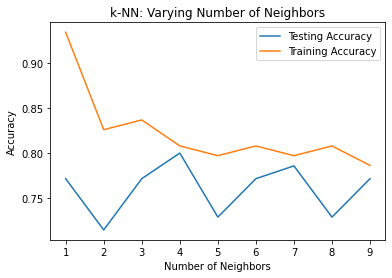

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
k = 7
# Train Model and Predict  
loanknn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [13]:
yhat = loanknn.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loanknn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7971014492753623
Test set Accuracy:  0.7857142857142857


In [15]:
from sklearn.metrics import classification_report

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.84      0.91      0.87        56

    accuracy                           0.79        70
   macro avg       0.64      0.60      0.61        70
weighted avg       0.76      0.79      0.77        70



In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7670011148272018

# Decision Tree

In [17]:
# Import the decision tree model
from sklearn.tree import DecisionTreeClassifier

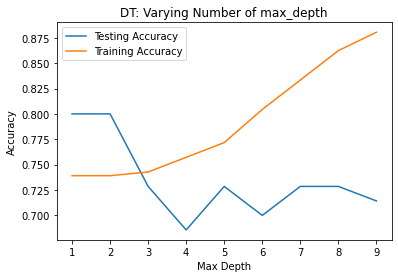

In [18]:
# Setup arrays to store train and test accuracies
d = np.arange(1, 10)
train_accuracy = np.empty(len(d))
test_accuracy = np.empty(len(d))

# Loop over different values of k
for i, d in enumerate(d):
    # Setup a k-NN Classifier with k neighbors: knn
    dt = DecisionTreeClassifier(max_depth=d)

    # Fit the classifier to the training data
    dt.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = dt.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dt.score(X_test, y_test)

# Generate plot
plt.title('DT: Varying Number of max_depth')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [19]:
#Building the decision tree
loandt = DecisionTreeClassifier(max_depth=8)

# Train the Decision tree model
loandt.fit(X_train,y_train)

# Predict using the model
yhat= loandt.predict(X_test)

In [20]:
#Calculating the train and test accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loandt.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
#Building the confusion matrix
print (classification_report(y_test, yhat))

Train set Accuracy:  0.8623188405797102
Test set Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

  COLLECTION       0.29      0.29      0.29        14
     PAIDOFF       0.82      0.82      0.82        56

    accuracy                           0.71        70
   macro avg       0.55      0.55      0.55        70
weighted avg       0.71      0.71      0.71        70



In [21]:
# Calculate the F1 score
f1_score(y_test, yhat, average='weighted')

0.7142857142857143

# Support Vector Machine

In [22]:
# Import the library for SVM Classifier
from sklearn import svm

loansvm = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat = loansvm.predict(X_test)

In [23]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.20      0.07      0.11        14
     PAIDOFF       0.80      0.93      0.86        56

    accuracy                           0.76        70
   macro avg       0.50      0.50      0.48        70
weighted avg       0.68      0.76      0.71        70



In [24]:
# Calculate the f1 score
f1_score(y_test, yhat, average='weighted')

0.7086559373640714

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
loanlr = LogisticRegression().fit(X_train,y_train)
yhat = loanlr.predict(X_test)

In [26]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.14      0.22        14
     PAIDOFF       0.82      0.96      0.89        56

    accuracy                           0.80        70
   macro avg       0.66      0.55      0.55        70
weighted avg       0.75      0.80      0.75        70



In [27]:
# Calculate the f1 score
f1_score(y_test, yhat, average='weighted')

0.7526411657559199

# Model Evaluation using Test set

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Load Test set for evaluation 

In [29]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [30]:
df = test_df
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature = df[['Principal','terms','age','Gender']]
df['effdayofweek'] = df['effective_date'].dt.dayofweek
df['effweekend'] = df['effdayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['dayofweek'] = df['due_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
Feature = df[['Principal','terms','age','Gender', 'effdayofweek', 'effweekend', 'dayofweek', 'weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X_test = Feature
y_test = df['loan_status'].values
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [31]:
# KNN model testing
yhat_knn = loanknn.predict(X_test)

# Calculate the f1 score
f1_knn = f1_score(y_test, yhat_knn, average='weighted') 
print('f1 score: ',f1_knn)

f1 score:  0.7434343434343433


In [32]:
# Predict using the model
yhat_dt= loandt.predict(X_test)

# Calculate the f1 score
f1_dt = f1_score(y_test, yhat_dt, average='weighted') 
print('f1 score: ',f1_dt)

f1 score:  0.7037037037037038


In [33]:
# Predict using the model
yhat_svm = loansvm.predict(X_test)

# Calculate the f1 score
f1_svm = f1_score(y_test, yhat_svm, average='weighted') 
print('f1 score: ',f1_svm)

f1 score:  0.7006734006734008


In [34]:
# Predict using the model
yhat_lr = loanlr.predict(X_test)

# Calculate the f1 score
f1_lr = f1_score(y_test, yhat_lr, average='weighted') 

# Calculate Log loss
yhat_lr_prob = loanlr.predict_proba(X_test)
ll_lr = log_loss(y_test, yhat_lr_prob)

print('f1 score: ',f1_lr)
print('Log Loss: ',ll_lr)

f1 score:  0.708937198067633
Log Loss:  0.45994195145947314


In [35]:
F1_score = [f1_knn,f1_dt,f1_svm,f1_lr]
LogLoss = ['NA','NA','NA',ll_lr]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,F1-score,LogLoss
0,KNN,0.743434,NA
1,Decistion Tree,0.703704,NA
2,SVM,0.700673,NA
3,LogisticRegression,0.708937,0.459942
